## Data Visualization (January 20)

### What's wrong with Just Looking at Numbers?

### It doesn't scale well

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [8]:
df = pd.read_csv('diabetes.csv')
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


In [5]:
df.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
count,403.000000,402.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,401.000000,401.000000
mean,15978.310174,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,37.900249,43.039900
std,11881.122124,44.445557,53.076655,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,5.729313,5.656713
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,33.000000,39.000000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,37.000000,42.000000
75%,20336.000000,230.000000,106.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,41.000000,46.000000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


In [6]:
df.dtypes

id            int64
chol        float64
stab.glu      int64
hdl         float64
ratio       float64
glyhb       float64
location     object
age           int64
gender       object
height      float64
weight      float64
frame        object
bp.1s       float64
bp.1d       float64
waist       float64
hip         float64
dtype: object

In [7]:
df[['age', 'weight', 'height','chol', 'waist']].corr()

,age,weight,height,chol,waist
age,1.000000,-0.055970,-0.090493,0.233119,0.149645
weight,-0.055970,1.000000,0.251251,0.066889,0.849855
height,-0.090493,0.251251,1.000000,-0.058858,0.051094
chol,0.233119,0.066889,-0.058858,1.000000,0.124489
waist,0.149645,0.849855,0.051094,0.124489,1.000000


<Axes: ylabel='Density'>

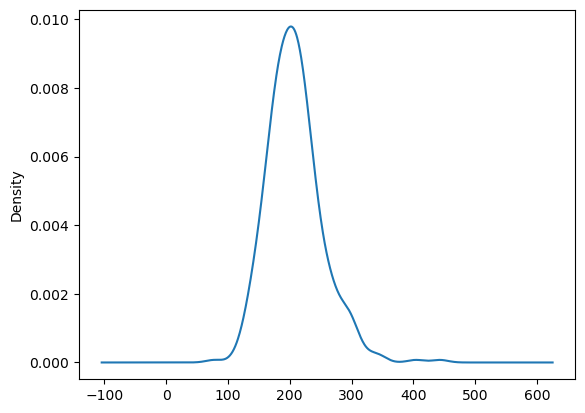

In [11]:
df['chol'].plot.density()

In [12]:
df['chol'].min()

78.0

<Axes: xlabel='chol', ylabel='Count'>

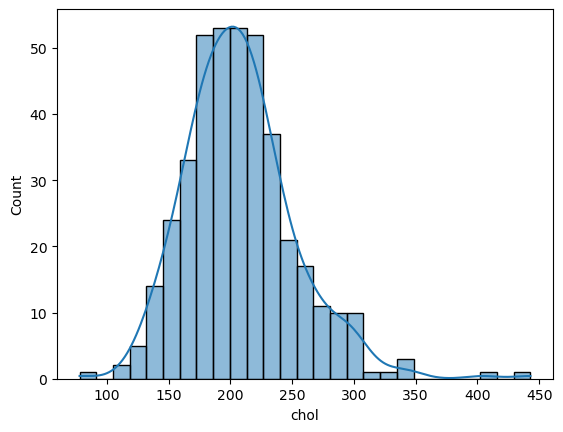

In [17]:
sb.histplot(data=df,x='chol',kde=True)

### Lots of bad visualizations shown

## Data Types and Techiques

### Distributions: Density Plots
- Visualizes the distribution of data over a continuous interval or time period
- A variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. 
- The peaks of a Density Plot help display where values are concentrated over the interval.


<Axes: ylabel='Density'>

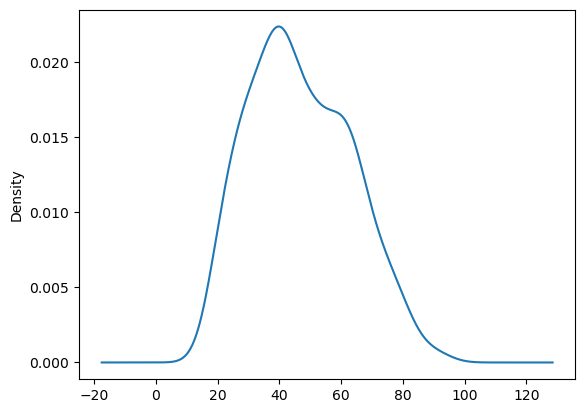

In [19]:
df['age'].plot.density()

<Axes: ylabel='Frequency'>

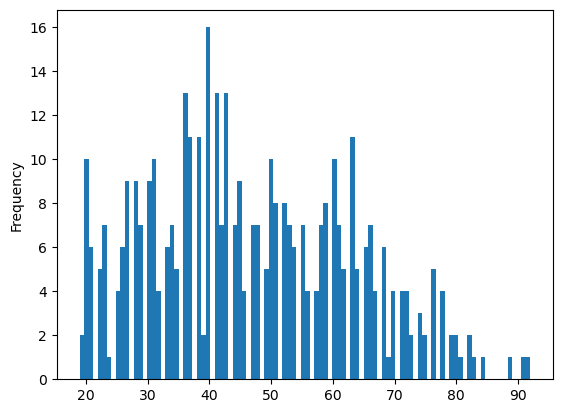

In [21]:
df['age'].plot.hist(bins=100)

<Axes: xlabel='age', ylabel='Count'>

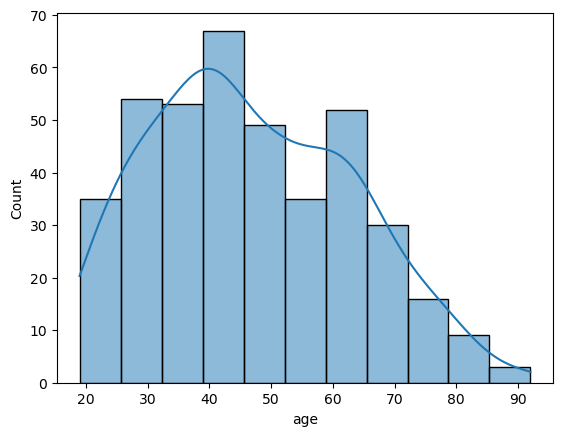

In [23]:
sb.histplot(data=df, x='age',kde=True)

### Distributions:Boxplot - Observations
- A convenient way of visually displaying the data distribution through their quartiles
- The lines extending parallel from the boxes are known as the whiskers and indicate - variability outside the upper and lower quartiles. 
- Outliers are sometimes plotted as individual dots that are in-line with whiskers. 


<Axes: >

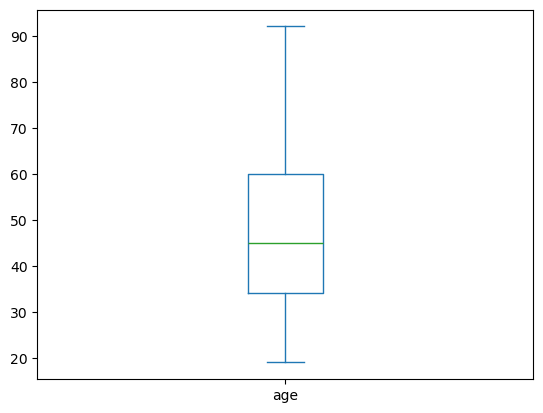

In [24]:
df.age.plot.box()

<Axes: >

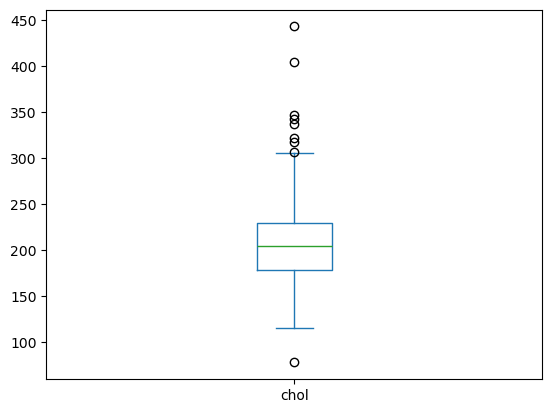

In [25]:
df['chol'].plot.box()

<Axes: xlabel='age'>

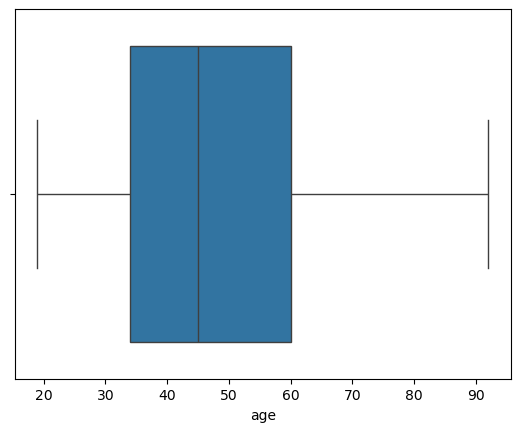

In [26]:
sb.boxplot(data=df, x='age')

<Axes: xlabel='age'>

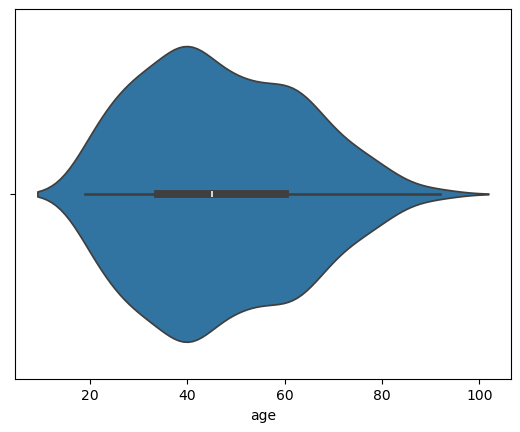

In [28]:
sb.violinplot(data=df, x='age')

In [31]:
df.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'waist',
       'hip'],
      dtype='object')

In [32]:
df.select_dtypes(include='number').columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'age', 'height',
       'weight', 'bp.1s', 'bp.1d', 'waist', 'hip'],
      dtype='object')

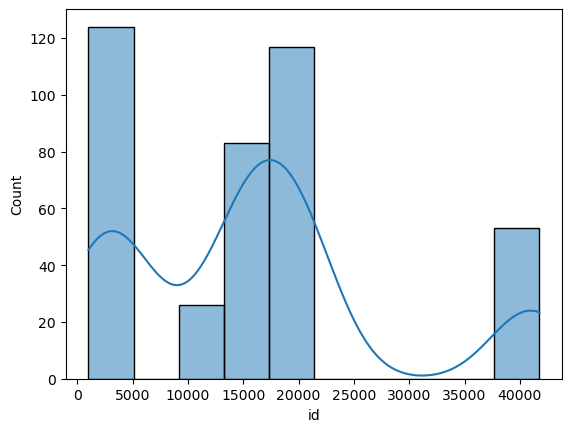

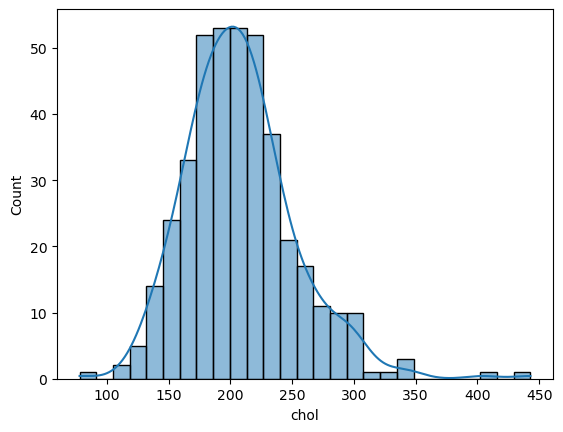

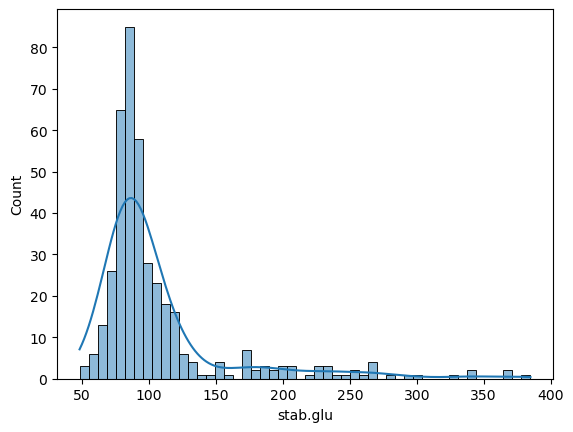

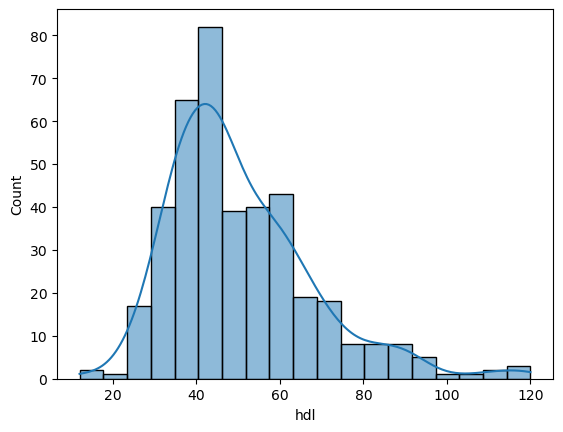

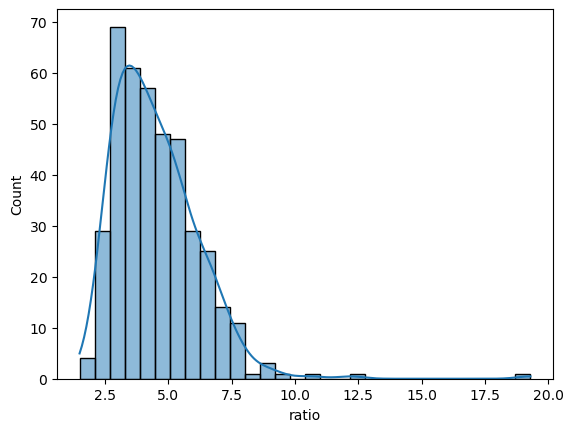

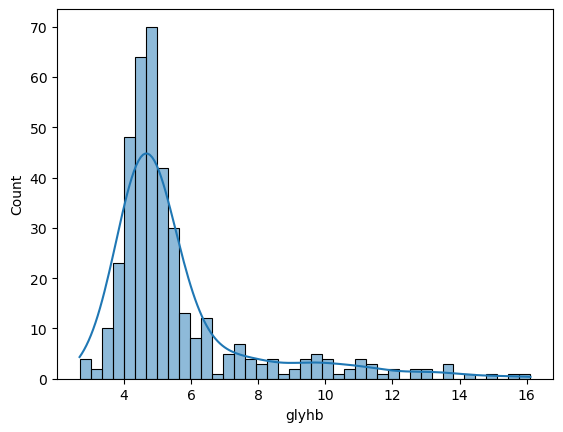

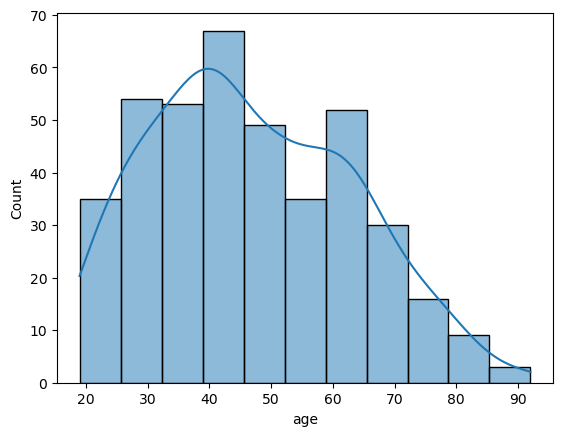

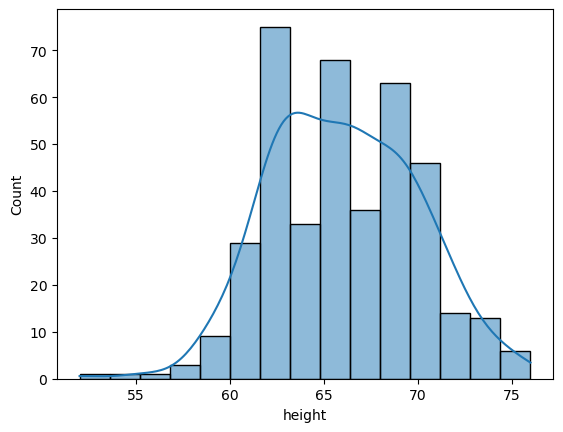

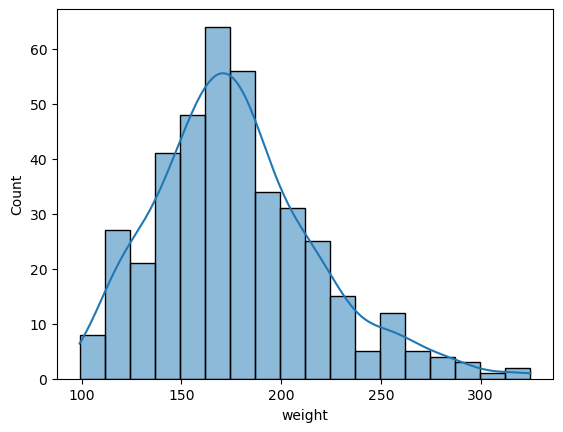

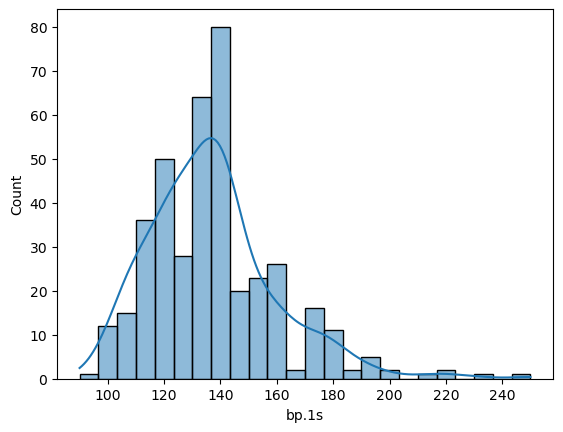

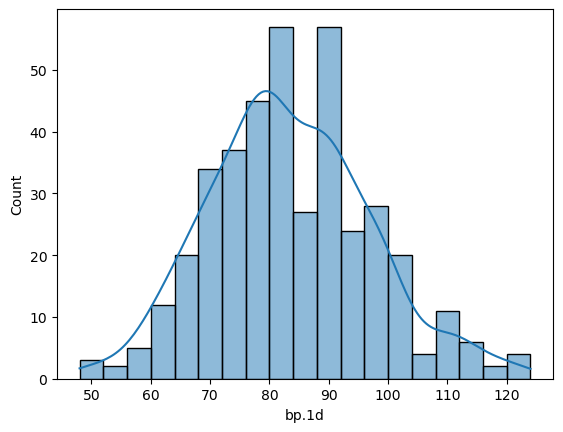

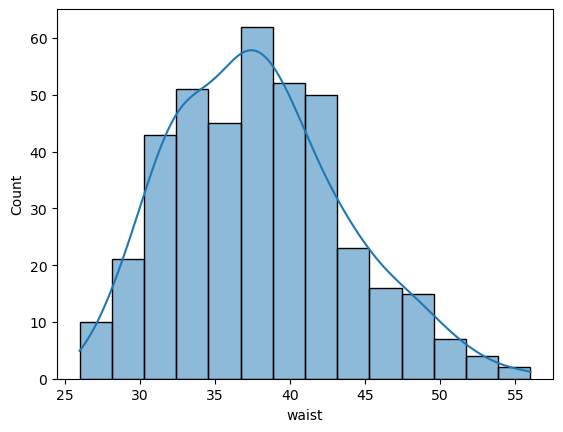

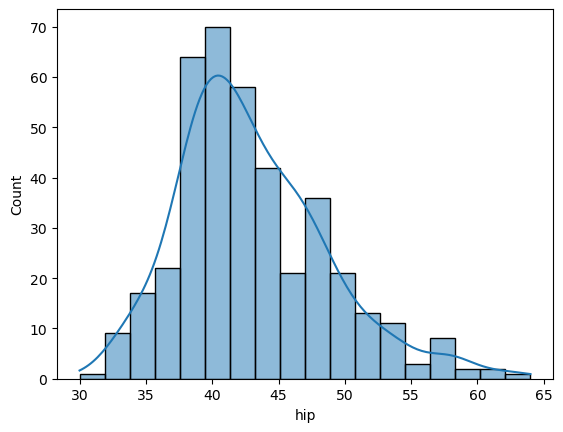

In [34]:
for col in df.select_dtypes(include='number').columns:
    sb.histplot(data=df,x=col,kde=True)
    plt.show()

In [37]:
df['frame'].value_counts()

frame
medium    184
small     104
large     103
Name: count, dtype: int64

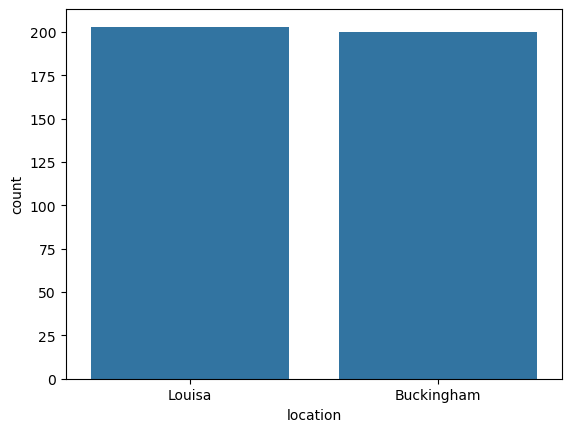

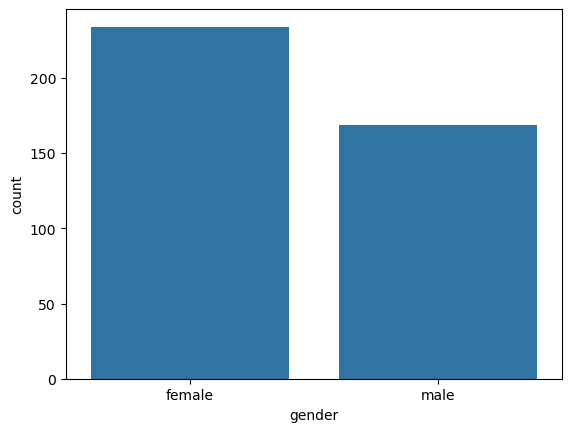

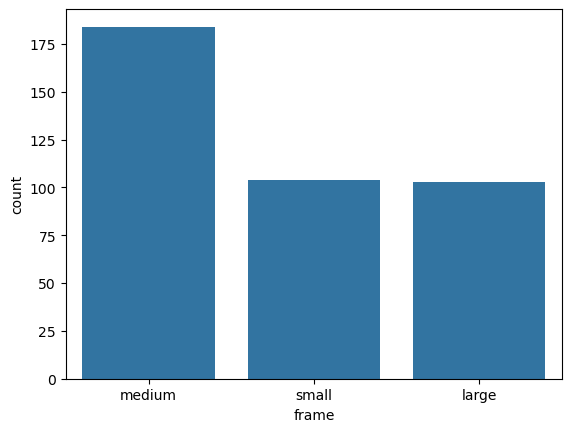

In [40]:
for col in df.select_dtypes(include='object').columns:
    sb.barplot(data=df[col].value_counts())
    plt.show()